# Holiday Package Prediction

## About Dataset
### Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

kaggle dataset:https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Travel.csv")

In [3]:
df.shape
print("The dataset consists of " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")

The dataset consists of 4888 rows and 20 columns.


In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Data Cleaning:

In [7]:
print("The gender column have :",df["Gender"].value_counts())
print("The MaritalStatus column have :",df["MaritalStatus"].value_counts())
print("The TypeofContact column have :",df["TypeofContact"].value_counts())

The gender column have : Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
The MaritalStatus column have : MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
The TypeofContact column have : TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


In [8]:
df["Gender"] = df["Gender"].replace("Fe Male","Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("Single","Unmarried")

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Checking Missing Values:

In [10]:
featurenan = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]

# Print the percentage of missing values for each feature
for feature in featurenan:
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 5)
    print(f"{feature}: {missing_percentage}% missing values")

Age: 4.62357% missing values
TypeofContact: 0.51146% missing values
DurationOfPitch: 5.13502% missing values
NumberOfFollowups: 0.92062% missing values
PreferredPropertyStar: 0.53191% missing values
NumberOfTrips: 2.86416% missing values
NumberOfChildrenVisiting: 1.35025% missing values
MonthlyIncome: 4.76678% missing values


In [11]:
df[featurenan].select_dtypes(exclude = "object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
# Fill missing values for each column
df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)  # Corrected
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)  # Corrected

In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop("CustomerID", axis = 1,inplace = True)

# Feature Engineering

In [15]:
df["TotalVisiting"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]
df.drop(["NumberOfPersonVisiting","NumberOfChildrenVisiting"] , axis = 1, inplace = True)

## Feature Extraction

In [16]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Features:", len(numeric_features))

Numeric Features: 12


In [17]:
categorical_features = df.select_dtypes(include=[object]).columns.tolist()
print("Categorical Features:", len(categorical_features))

Categorical Features: 6


In [18]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
print("Discrete Features:", len(discrete_features))

Discrete Features: 9


In [19]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]
print("Continuous Features:", len(continuous_features))

Continuous Features: 3


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
x = df.drop(["ProdTaken"] , axis =1)
y = df["ProdTaken"]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [22]:
# create Column Transformer with 3 types of transformer
cat_feature = x.select_dtypes(include = "object").columns
num_feature = x.select_dtypes(exclude = "object").columns
from sklearn.preprocessing  import OneHotEncoder ,  StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transfomer = OneHotEncoder()
preprocessor =  ColumnTransformer(
    [
        ("OneHotEncoder",oh_transfomer, cat_feature),
        ("StandardScaler" , numeric_transformer, num_feature)
    ]
        
)

In [23]:
x_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
3995,36.0,Self Enquiry,1,7.0,Small Business,Male,5.0,Basic,3.0,Unmarried,3.0,0,4,1,Executive,21537.0,3.0
2610,42.0,Self Enquiry,1,21.0,Salaried,Male,4.0,Basic,3.0,Married,6.0,0,4,1,Executive,21129.0,5.0
3083,50.0,Self Enquiry,1,7.0,Large Business,Female,4.0,Basic,5.0,Divorced,4.0,0,4,1,Executive,22258.0,4.0
3973,38.0,Self Enquiry,1,7.0,Salaried,Male,5.0,Deluxe,3.0,Married,3.0,0,5,0,Manager,24671.0,4.0
4044,44.0,Company Invited,1,35.0,Small Business,Female,2.0,Basic,3.0,Unmarried,6.0,0,3,0,Executive,23417.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,Self Enquiry,1,10.0,Small Business,Male,5.0,Basic,3.0,Unmarried,2.0,0,1,1,Executive,20723.0,5.0
466,41.0,Self Enquiry,3,8.0,Salaried,Female,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,AVP,31595.0,4.0
3092,38.0,Company Invited,3,28.0,Small Business,Female,4.0,Basic,3.0,Divorced,7.0,0,2,1,Executive,21651.0,5.0
3772,28.0,Self Enquiry,3,30.0,Small Business,Female,5.0,Deluxe,3.0,Married,3.0,0,1,1,Manager,22218.0,5.0


In [24]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

## Random Forest CLassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    classification_report,
    roc_curve
)

###### Efficient way to train the model using difffernet model

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "Ada Boost":AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier()
}
for i in range(len(list(models))):
                        model= list(models.values())[i]
                        model.fit(x_train,y_train)
                        # Make Prediction
                        y_train_pred = model.predict(x_train)
                        y_test_pred = model.predict(x_test)
                        is_binary = len(np.unique(y_train)) == 2
                        # Training set Preformance
                        model_train_accuracy = accuracy_score(y_train, y_train_pred)
                        model_train_precision = precision_score(y_train, y_train_pred, average='binary' if is_binary else 'macro')
                        model_train_recall = recall_score(y_train, y_train_pred, average='binary' if is_binary else 'macro')
                        model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")
                        model_train_roc = roc_auc_score(y_train,y_train_pred)
                            
                            # Calculate metrics for the test set
                        model_test_accuracy = accuracy_score(y_test, y_test_pred)
                        model_test_precision = precision_score(y_test, y_test_pred, average='binary' if is_binary else 'macro')
                        model_test_recall = recall_score(y_test, y_test_pred, average='binary' if is_binary else 'macro')
                        model_test_f1 = f1_score(y_test, y_test_pred, average="weighted")
                        model_test_roc = roc_auc_score(y_test,y_test_pred)
                            
                            # Print results
                        print(list(models.keys())[i])
                        print("-----------Metrics for Train Data------------" ) 
                        print(f"Training Set Accuracy: {model_train_accuracy:.4f}")
                        print(f"Training Set Precision: {model_train_precision:.4f}")
                        print(f"Training Set Recall: {model_train_recall:.4f}")
                        print(f"Training Set F1 Score: {model_train_f1:.4f}")
                        print(f"Training Set Roc Auc Score: {model_train_roc:.4f}")
                        print("-----------Metrics for Test Data------------" ) 
                        print(f"Test Set Accuracy: {model_test_accuracy:.4f}")
                        print(f"Test Set Precision: {model_test_precision:.4f}")
                        print(f"Test Set Recall: {model_test_recall:.4f}")
                        print(f"Test Set F1 Score: {model_test_f1:.4f}")
                        print(f"Test Set Roc Auc Score: {model_test_roc:.4f}")
                        print()
                        print('='*35)
                        print('\n')

Logistic Regression
-----------Metrics for Train Data------------
Training Set Accuracy: 0.8463
Training Set Precision: 0.7013
Training Set Recall: 0.3059
Training Set F1 Score: 0.8208
Training Set Roc Auc Score: 0.6380
-----------Metrics for Test Data------------
Test Set Accuracy: 0.8354
Test Set Precision: 0.6829
Test Set Recall: 0.2932
Test Set F1 Score: 0.8078
Test Set Roc Auc Score: 0.6301



Decision Tree
-----------Metrics for Train Data------------
Training Set Accuracy: 1.0000
Training Set Precision: 1.0000
Training Set Recall: 1.0000
Training Set F1 Score: 1.0000
Training Set Roc Auc Score: 1.0000
-----------Metrics for Test Data------------
Test Set Accuracy: 0.9192
Test Set Precision: 0.8182
Test Set Recall: 0.7539
Test Set F1 Score: 0.9180
Test Set Roc Auc Score: 0.8566



Gradient Boost
-----------Metrics for Train Data------------
Training Set Accuracy: 0.8913
Training Set Precision: 0.8671
Training Set Recall: 0.4925
Training Set F1 Score: 0.8789
Training Set Roc Auc S

##### If i donot specify  average='binary' if is_binary else 'macro' then defualt behaviour will be aplied which is marco in case of multiclass and binary in case of binary class

# HyperParameter Tunning

In [33]:
#Define the parameter grid
param_grid = {
   'criterion' : ["gini", "entropy", "log_loss"],
    "n_estimators" : [ 10, 20,50 ,100],
    'max_features' : ["sqrt", "log2", None],
    'bootstrap': [True, False],
    "max_depth" :  [None, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 6, 7, 8, 12, 15],
    'min_samples_leaf': [1, 2, 4,3, 5, 6, 8, 10]
}
adaboost_param = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ["SAMME", "SAMME.R"]
}

In [34]:
randomcv_model = [
    ( "RF" , RandomForestClassifier() , param_grid),
    ("AB" , AdaBoostClassifier(), adaboost_param)
]

##### Randomized search cv

In [37]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

# Improved print output
for model_name, params in model_param.items():
    print(f"---------------------------- Best Params for {model_name} ----------------------------")
    for param, value in params.items():
        print(f"{param}: {value}")
    print("------------------------------------------------------------------------------")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
---------------------------- Best Params for RF ----------------------------
n_estimators: 100
min_samples_split: 3
min_samples_leaf: 1
max_features: log2
max_depth: 30
criterion: entropy
bootstrap: False
------------------------------------------------------------------------------
---------------------------- Best Params for AB ----------------------------
n_estimators: 100
learning_rate: 1.0
algorithm: SAMME
------------------------------------------------------------------------------


In [40]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators = 100 ,min_samples_split =2,min_samples_leaf = 1,max_features ="sqrt", criterion ="gini" , bootstrap=False ),
    "Ada Boost":AdaBoostClassifier(n_estimators= 100,learning_rate = 1.0 ,algorithm = "SAMME")
}
for i in range(len(list(models))):
                        model= list(models.values())[i]
                        model.fit(x_train,y_train)
                        # Make Prediction
                        y_train_pred = model.predict(x_train)
                        y_test_pred = model.predict(x_test)
                        is_binary = len(np.unique(y_train)) == 2
                        # Training set Preformance
                        model_train_accuracy = accuracy_score(y_train, y_train_pred)
                        model_train_precision = precision_score(y_train, y_train_pred, average='binary' if is_binary else 'macro')
                        model_train_recall = recall_score(y_train, y_train_pred, average='binary' if is_binary else 'macro')
                        model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")
                        model_train_roc = roc_auc_score(y_train,y_train_pred)
                            
                            # Calculate metrics for the test set
                        model_test_accuracy = accuracy_score(y_test, y_test_pred)
                        model_test_precision = precision_score(y_test, y_test_pred, average='binary' if is_binary else 'macro')
                        model_test_recall = recall_score(y_test, y_test_pred, average='binary' if is_binary else 'macro')
                        model_test_f1 = f1_score(y_test, y_test_pred, average="weighted")
                        model_test_roc = roc_auc_score(y_test,y_test_pred)
                            
                            # Print results
                        print(list(models.keys())[i])
                        print("-----------Metrics for Train Data------------" ) 
                        print(f"Training Set Accuracy: {model_train_accuracy:.4f}")
                        print(f"Training Set Precision: {model_train_precision:.4f}")
                        print(f"Training Set Recall: {model_train_recall:.4f}")
                        print(f"Training Set F1 Score: {model_train_f1:.4f}")
                        print(f"Training Set Roc Auc Score: {model_train_roc:.4f}")
                        print("-----------Metrics for Test Data------------" ) 
                        print(f"Test Set Accuracy: {model_test_accuracy:.4f}")
                        print(f"Test Set Precision: {model_test_precision:.4f}")
                        print(f"Test Set Recall: {model_test_recall:.4f}")
                        print(f"Test Set F1 Score: {model_test_f1:.4f}")
                        print(f"Test Set Roc Auc Score: {model_test_roc:.4f}")
                        print()
                        print('='*35)
                        print('\n')

Random Forest
-----------Metrics for Train Data------------
Training Set Accuracy: 1.0000
Training Set Precision: 1.0000
Training Set Recall: 1.0000
Training Set F1 Score: 1.0000
Training Set Roc Auc Score: 1.0000
-----------Metrics for Test Data------------
Test Set Accuracy: 0.9499
Test Set Precision: 0.9863
Test Set Recall: 0.7539
Test Set F1 Score: 0.9472
Test Set Roc Auc Score: 0.8757



Ada Boost
-----------Metrics for Train Data------------
Training Set Accuracy: 0.8483
Training Set Precision: 0.7742
Training Set Recall: 0.2634
Training Set F1 Score: 0.8163
Training Set Roc Auc Score: 0.6229
-----------Metrics for Test Data------------
Test Set Accuracy: 0.8384
Test Set Precision: 0.7895
Test Set Recall: 0.2356
Test Set F1 Score: 0.8011
Test Set Roc Auc Score: 0.6102





#### Roc auc Curve and Roc Curve

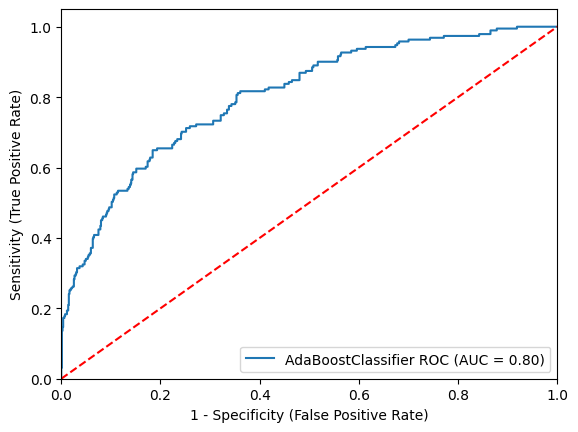

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# Add the model to the list that you want to view
auc_models = [
    {
        "label": "AdaBoostClassifier",
        "model": AdaBoostClassifier(n_estimators= 100,learning_rate = 1.0 ,algorithm = "SAMME"),
        "auc": 0.8757  # This is a placeholder; actual AUC should be computed
    }
]

# Loop through each model
for algo in auc_models:
    model = algo["model"]  # select the model
    model.fit(x_train, y_train)
    
    # Compute false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])  # Use x_test, and get the probabilities for the positive class

    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label="%s ROC (AUC = %0.2f)" % (algo["label"], auc_score))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.ylabel("Sensitivity (True Positive Rate)")
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()


This tells that 99% of area is covered with RandomForest